In [1]:
#Import Tools

import os
import shapely
import six
import fiona
import requests

import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pysal as ps

import statsmodels.api as sm

from pandas import DataFrame
from matplotlib import colors



from fiona.crs import from_epsg
import geopandas as gpd
from geopandas import GeoDataFrame
%matplotlib inline

        

### A very good reference I found for working with geopandas 

 http://blog.danwin.com/census-places-cartodb-geopandas-mapping/

### And another:

https://github.com/dannguyen/gis-geospatial-fun-python3x/blob/master/notebooks/Geopandas%20on%20OS%20X%20and%20Anaconda%20+%20Python%203.5.ipynb

In [2]:
ct_shape_geojson = "http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nycb2010/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson"
ct_shape_url = "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip"    



Import the file from local

In [3]:
shape_path = 'Data/nycb2010_16d/nycb2010.shp'
ct_shape = gpd.read_file(shape_path)

In [4]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon

In [5]:
len(ct_shape)

38794

In [6]:
ct_shape_BK = ct_shape.loc[ct_shape['BoroName'] == 'Brooklyn']

In [7]:
ct_shape_BK.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((982421.0634155273 178133.8510131836,..."
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,"POLYGON ((985596.1882324219 193858.6517944336,..."
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((986271.9053955078 193612.9270019531,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((988369.8604125977 192442.1943969727,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,"POLYGON ((988949.616394043 193714.8265991211, ..."


In [8]:
len(ct_shape_BK)

9682

convert the coordinates to lat/lon

Reference: https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb

In [9]:
ct_shape_BK.crs = from_epsg(2263) #epsg=2263 is US feet
conv_ct_shape_BK = ct_shape_BK.to_crs(epsg=4326) # epsg=4326: lat/on  


In [10]:
conv_ct_shape_BK.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567194...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.98514306089652 40.6948851429698,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [11]:
len(conv_ct_shape_BK)

9682

In [12]:
conv_ct_shape_BK

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,2.084850e+05,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,6.336596e+04,1006.913933,POLYGON ((-73.99514512602698 40.69877384567194...
5039,30005011000,3,Brooklyn,1000,000501,1.163032e+05,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
5040,30011001000,3,Brooklyn,1000,001100,5.480231e+04,951.657541,"POLYGON ((-73.98514306089652 40.6948851429698,..."
5041,30015001000,3,Brooklyn,1000,001500,7.919653e+04,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...
5042,30020001000,3,Brooklyn,1000,002000,2.031509e+05,2076.660170,POLYGON ((-74.01298705619367 40.64945600085578...
5043,30022001000,3,Brooklyn,1000,002200,2.029898e+05,2080.720191,POLYGON ((-74.01925526318796 40.64685276170034...
5044,30030001000,3,Brooklyn,1000,003000,2.288488e+03,251.742624,POLYGON ((-74.02626267406124 40.64009438133772...
5045,30031001000,3,Brooklyn,1000,003100,2.144473e+05,1902.577167,POLYGON ((-73.97782679465361 40.69343813939842...
5046,30033001000,3,Brooklyn,1000,003300,2.582286e+05,2448.507197,POLYGON ((-73.97510566428164 40.68969750917617...


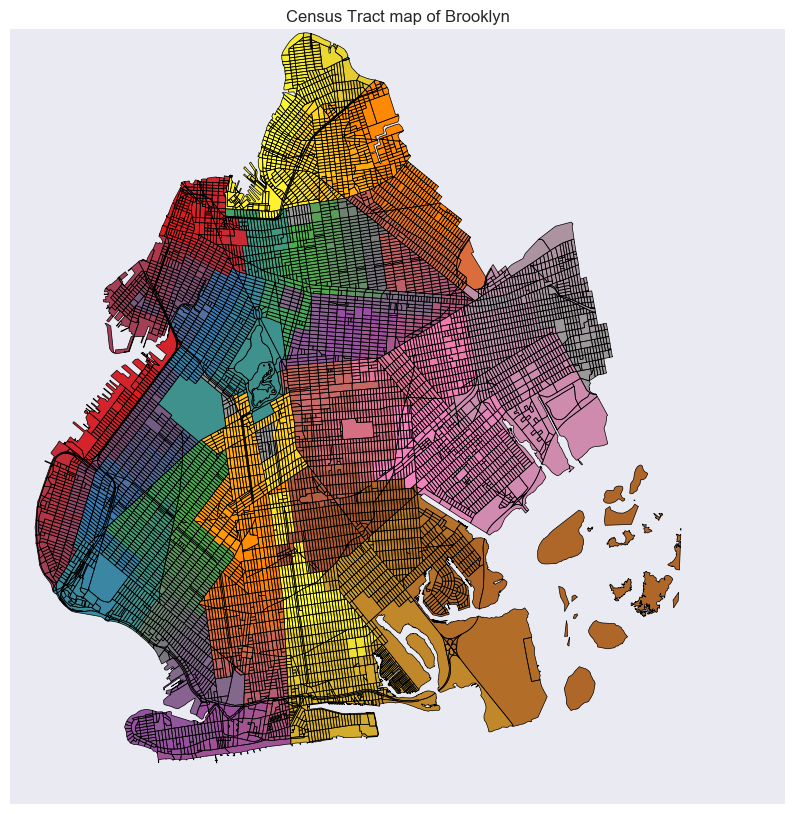

In [13]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
conv_ct_shape_BK.plot(column='CT2010',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map of Brooklyn")

Figure 1. Map of the Census tracts of Brooklyn, NY. as of 2010. 

Find the coordinates of CUSP: 1 MetroTech Brooklyn. 

In [14]:

##replace with os.getenv('GoogleAPI')

In [15]:
map_url = 'https://maps.googleapis.com/maps/api/geocode/json?address=1+MetroTech+Center,+Brooklyn,+ ' + 'NY&key='

In [16]:
print(map_url)

https://maps.googleapis.com/maps/api/geocode/json?address=1+MetroTech+Center,+Brooklyn,+ NY&key=


In [17]:
#Get Coordinates of an address from Google with API:
#Ref #1 https://developers.google.com/maps/documentation/geocoding/start#get-a-key
#Ref #2 http://stackoverflow.com/questions/25888396/how-to-get-latitude-longitude-with-python

response = requests.get(map_url + os.getenv('GOOGLEMAPSAPI'))
resp_json_payload = response.json()

print(resp_json_payload['results'][0]['geometry']['location'])


{u'lat': 40.6932169, u'lng': -73.986403}


I guess there is a securit concern here that you can just use the command

print(os.getenv('GOOGLEMAPSAPI'))

If you wanted to see the API code but at least it is not in the Ipython notebook. 

CUSP location: {u'lat': 40.6932169, u'lng': -73.986403}

Create a Point shapely geometry with the coordinates of CUSP
shapely.geometry.Point()

Reference:http://toblerity.org/shapely/shapely.geometry.html#module-shapely.geometry.point


In [41]:
CUSP_point = shapely.geometry.Point(-73.986403, 40.6932169)

In [42]:
print(CUSP_point)

POINT (-73.986403 40.6932169)


4.. Loop over the Brooklyn polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [21]:
#created a new dataframe in case I run into problem later with the index. 
conv_ct_shape_BK2 = conv_ct_shape_BK.reset_index()

In [22]:
conv_ct_shape_BK2.head(1)

,index,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...


In [23]:
conv_ct_shape_BK.head(1)

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...


In [40]:
conv_ct_shape_BK.shape

(9682, 8)

In [24]:
# you will need to use 
# - ct_latlon.geometry (the polygons you are looping over)
# - shapely.geometry.asShape(<the polygon>).contain(<the point>)
# - save the index of the polygon that contains the CUSP
#for i, ct  in [.....]
#    print('CUSP is contained in', ct)

Very Nice Reference: http://gis.stackexchange.com/questions/84114/shapely-unable-to-tell-if-polygon-contains-point



In [46]:
for i in conv_ct_shape_BK.index:
    if conv_ct_shape_BK.geometry[i].contains(CUSP_point):
        print("Cusp is located", i)
       


('Cusp is located', 35383)


I think the result from the for loop is correct but I am not sure what it means.  

Rather than fix the for loop I am going to try something else. 
Reference: http://streamhacker.com/2010/03/23/python-point-in-polygon-shapely/

In [44]:
CUSP_loc = conv_ct_shape_BK[conv_ct_shape_BK.geometry.contains(CUSP_point)]

In [48]:
print(CUSP_loc)

         BCTCB2010 BoroCode  BoroName CB2010  CT2010    Shape_Area  \
35383  30011001009        3  Brooklyn   1009  001100  69934.269433   

        Shape_Leng                                           geometry  
35383  1061.280668  POLYGON ((-73.98619262163143 40.693753518938, ...  


Cusp is located in BCTCB2010 30011001009. 

Plot every ten and picks out CUSP

Reference (rather long): http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer

Reference for "suptitle" : https://stackoverflow.com/questions/1388450/giving-graphs-a-subtitle-in-matplotlib

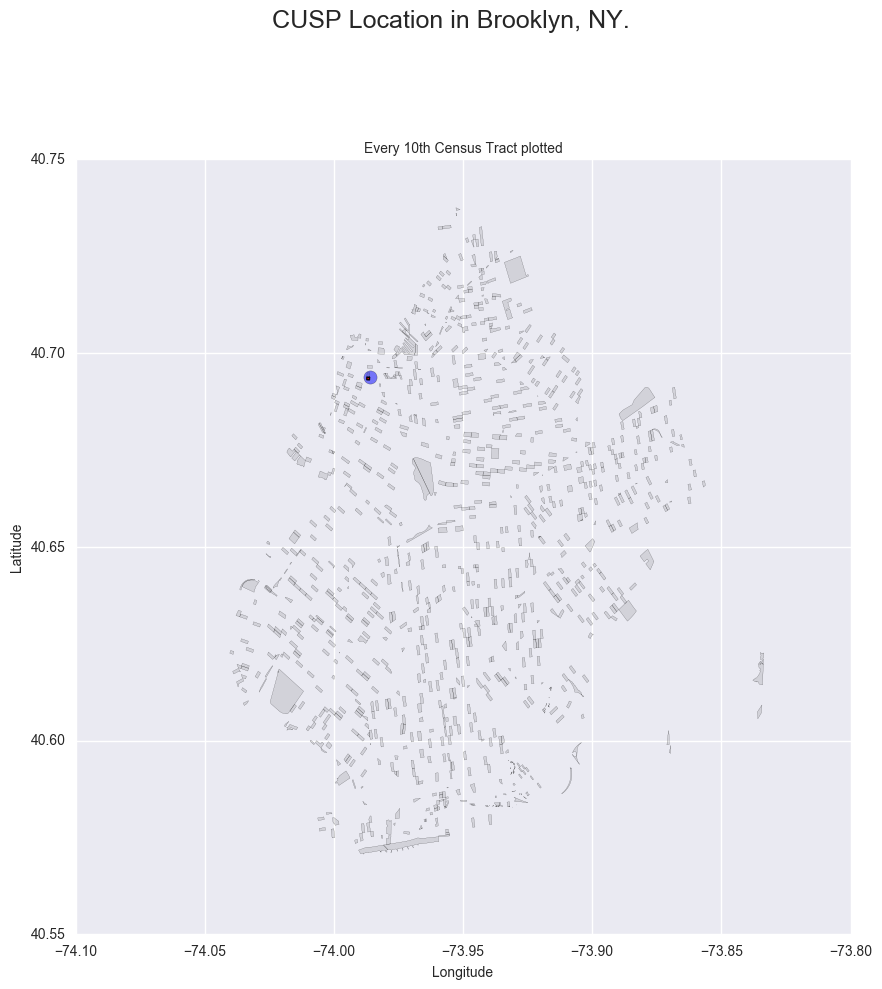

In [64]:
#Plot every 10th Census Tract
f, ax = plt.subplots(1, figsize = (10,10))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)   


#Plot CUSP in red
conv_ct_shape_BK[conv_ct_shape_BK['BCTCB2010'] == '30011001009'].plot(color='red', alpha=1, linewidth=1,ax=ax)    

#Plot every 10th. 
conv_ct_shape_BK[::10].plot(color='black', alpha=.1,linewidth=0.1,ax=ax)

#plot point 
ax.scatter(-73.98619262163143, 40.693753518938, s = 90, c = 'blue', alpha=.5)

#Label the Axis 
ax.legend(loc = 'best', fontsize=10)
ax.set_xlabel("Longitude", fontsize = 10)
ax.set_ylabel("Latitude", fontsize = 10)

#Title
plt.suptitle("CUSP Location in Brooklyn, NY.", y = 1.05, fontsize = 18)
plt.title("Every 10th Census Tract plotted", fontsize = 10)

Figure 2.  THe location of CUSP amongst the Borough of Brooklyn. note: every 10th Census Tract is plotted for breviety. 



I have no odea why I cant plot legends.  I had the same problem during the hack day. 